In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input, Dense, LSTM, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import text_to_word_sequence
%matplotlib inline

In [27]:
df = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
df_test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
df_train = df.copy()
df_test_copy = df_test.copy()

In [28]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [29]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [30]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [31]:
classes = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
train = df['comment_text']
test = df_test['comment_text']
train_y = df[classes].values

In [32]:
l = len(train)
lt = len(test)

In [33]:
print(l)
print(lt)

159571
153164


In [34]:
train.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [35]:
train_y[:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [36]:
test.head()

0    Yo bitch Ja Rule is more succesful then you'll...
1    == From RfC == \n\n The title is fine as it is...
2    " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    :If you have a look back at the source, the in...
4            I don't anonymously edit articles at all.
Name: comment_text, dtype: object

In [37]:
train[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [38]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [39]:
train.head()

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."


In [40]:
test.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [41]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(train['comment_text']))
tokenized_train_comments = tokenizer.texts_to_sequences(list(train['comment_text']))
tokenized_test_comments = tokenizer.texts_to_sequences(list(test['comment_text']))

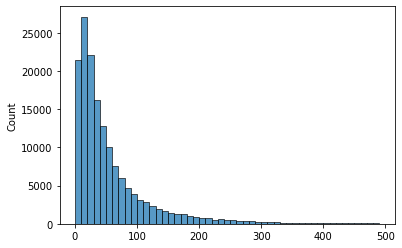

In [42]:
comment = [len(comment) for comment in tokenized_train_comments]
sns.histplot(comment,bins=np.arange(0,500,10))
plt.show()

In [43]:
tokenized_train_comments[:2]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985],
 [52,
  2635,
  13,
  555,
  3809,
  73,
  4556,
  2706,
  21,
  94,
  38,
  803,
  2679,
  992,
  589,
  8377,
  182]]

In [44]:
X_train = pad_sequences(tokenized_train_comments,maxlen = 250)
X_test = pad_sequences(tokenized_test_comments,maxlen = 250)

In [45]:
len(X_train[1])

250

In [46]:
#Model
inputlayer = Input(shape = 250)
embedlayer = Embedding(input_dim = 20000, output_dim = 128)(inputlayer)
lstmLayer = LSTM(units = 60, return_sequences = True)(embedlayer)
mxpool = GlobalMaxPooling1D()(lstmLayer)
dropout1 = Dropout(0.1)(mxpool)
fcLayer1 = Dense(units = 50, activation = 'relu')(dropout1)
dropout2 = Dropout(0.1)(fcLayer1)
fclayer2 = Dense(units = 6, activation = 'sigmoid')(dropout2)
model = Model(inputs = inputlayer, outputs = fclayer2)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0   

In [47]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['AUC'])

In [48]:
model.fit(X_train,train_y,batch_size = 32,epochs = 2,validation_split = 0.1)

Epoch 1/2
4488/4488 [==============================] - 205s 45ms/step - loss: 0.1079 - auc: 0.8866 - val_loss: 0.0499 - val_auc: 0.9776
Epoch 2/2
4488/4488 [==============================] - 204s 45ms/step - loss: 0.0442 - auc: 0.9850 - val_loss: 0.0465 - val_auc: 0.9800


In [49]:
predicted = model.predict(X_test, batch_size = 32)
predict = np.hstack((df_test.id[:, np.newaxis], predicted))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [50]:
submission = pd.DataFrame(predict, columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
submission.to_csv('submission1.csv', index = False)